# Milestone

Link Tableau Dashboard : https://public.tableau.com/app/profile/diko.ikhram/viz/AnalysisTLKM/Dashboard1?publish=yes

## Introduction

In [2]:
'''
=================================================
Milestone

Nama  : Diko Alfatha Ikhram
Batch : RMT-29

Program ini dibuat untuk menganalisa Return of Invesment pada saham Telkom
=================================================
'''

'\n=================================================\nMilestone\n\nNama  : Diko Alfatha Ikhram\nBatch : RMT-29\n\nProgram ini dibuat untuk menganalisa Return of Invesment pada saham Telkom\n=================================================\n'

## Library

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns

## Business Understanding

Kamu adalah seorang data analyst dan kamu ingin memulai investasi mu, kamu memilih saham Telkom(TLKM) sebagai saham pertama mu. Tujuan kamu adalah melihat seberapa besar keuntungan yang bisa kamu dapatkan pada saham TLKM.

### Defining the Problem Statements

SMART Framework:
1. **Specific**: Mencari tahu berapa besar keuntungan yang bisa didapatkan menggunakan Return of Invesment(ROI).
2. **Measurable**: Mencapai ROI sebesar 10%.
3. **Achievable**: Dengan melihat kapan harga minimum saham, rata-rata dan harga maximumnya.
4. **Relevant**: Dengan memilih harga saham yang tepat dapat membantu meningkatkan ROI yang didapatkan.
5. **Time-Bound**: Dapat dicapai dalam 90 hari.

`Problem statement`:

Dengan mencari tahu seberapa besar keutungan yang bisa didapatkan, mencapai 10% ROI dalam kurun waktu 90 hari ke depan. Ini dapat dilakukan dengan cara meilhat minimal, rata-rata dan maximum harga saham, sehingga dapat mengatahui besar keuntungan yang bisa didapatkan.

### Breaking Down the Problem

Main problem : `Mencari tahu Return of Invesment(ROI) sebagai metrik menghitung keuntungan`

5W+1H:
1. Berapa Minimum, maximum, Median dan Mean dari harga saham TLKM?
2. Kapan harga saham dititik yang rendah?
3. Kapan harga saham dititik yang tinggi?
4. Bagaimana tren pergerakan harga saham TLKM selama periode 2020 sampai 2023?
5. Berapa minimum dan maximum ROI yang bisa didapatkan?
6. Berapa persent kemungkinan ROI Profit dan Loss?

## Data Understanding

### Data Loading

In [4]:
# memanggil file csv untuk dijadikan dataframe
df = pd.read_csv('TLKM.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,3970.0,4000.0,3900.0,3910.0,3278.988770,52094000
1,2020-01-03,3960.0,3980.0,3930.0,3980.0,3337.692139,70032900
2,2020-01-06,3930.0,3970.0,3930.0,3960.0,3320.919434,42908900
3,2020-01-07,3930.0,3970.0,3920.0,3940.0,3304.147217,51837600
4,2020-01-08,3920.0,3950.0,3900.0,3900.0,3270.602295,52402600
...,...,...,...,...,...,...,...
953,2023-11-29,3750.0,3770.0,3700.0,3720.0,3720.000000,56467400
954,2023-11-30,3750.0,3820.0,3740.0,3760.0,3760.000000,258522400
955,2023-12-01,3790.0,3840.0,3790.0,3830.0,3830.000000,81037200
956,2023-12-04,3840.0,3860.0,3780.0,3810.0,3810.000000,118483900


data didapatkan dari website yahoo finance, data yang diambil dari januari tahun 2020 sampai desember 2023. Link :
https://finance.yahoo.com/quote/TLKM.JK/history?period1=1577836800&period2=1701820800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

### Dataframe summary

In [5]:
# cek info dari dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       958 non-null    object 
 1   Open       958 non-null    float64
 2   High       958 non-null    float64
 3   Low        958 non-null    float64
 4   Close      958 non-null    float64
 5   Adj Close  958 non-null    float64
 6   Volume     958 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 52.5+ KB


dari df.info() dapat dilihat data memiliki 958 data, kolom Date memiliki type data object, kolom Open, High, Low, Close, Adj Close memiliki tipe data float dan kolom Volume memiliki tipe data int.

In [6]:
# cek ukuran data dan kolom
df.shape

(958, 7)

dari hasi df.shape dataframe memiliki 958 row data dan 7 kolom pada datanya

In [7]:
# cek kolom date
df['Date']

0      2020-01-02
1      2020-01-03
2      2020-01-06
3      2020-01-07
4      2020-01-08
          ...    
953    2023-11-29
954    2023-11-30
955    2023-12-01
956    2023-12-04
957    2023-12-05
Name: Date, Length: 958, dtype: object

Pada kolom Date, data yang ada disetiap rownya adalah date dengan tipe data kolomnya object. Maka nanti ketika tahap Data Cleaning, tipe datanya akan diubah menjadi date.

In [8]:
# cek kolom Open
df['Open']

0      3970.0
1      3960.0
2      3930.0
3      3930.0
4      3920.0
        ...  
953    3750.0
954    3750.0
955    3790.0
956    3840.0
957    3830.0
Name: Open, Length: 958, dtype: float64

Pada kolom Open, data yang ada disetiap rownya adalah float dengan tipe data kolomnya float.

In [9]:
# cek kolom High
df['High']

0      4000.0
1      3980.0
2      3970.0
3      3970.0
4      3950.0
        ...  
953    3770.0
954    3820.0
955    3840.0
956    3860.0
957    3850.0
Name: High, Length: 958, dtype: float64

Pada kolom High, data yang ada disetiap rownya adalah float dengan tipe data kolomnya float.

In [10]:
# cek kolom Low
df['Low']

0      3900.0
1      3930.0
2      3930.0
3      3920.0
4      3900.0
        ...  
953    3700.0
954    3740.0
955    3790.0
956    3780.0
957    3800.0
Name: Low, Length: 958, dtype: float64

Pada kolom Low, data yang ada disetiap rownya adalah float dengan tipe data kolomnya float.

In [11]:
# cek kolom Close
df['Close']

0      3910.0
1      3980.0
2      3960.0
3      3940.0
4      3900.0
        ...  
953    3720.0
954    3760.0
955    3830.0
956    3810.0
957    3850.0
Name: Close, Length: 958, dtype: float64

Pada kolom Close, data yang ada disetiap rownya adalah float dengan tipe data kolomnya float.

In [12]:
# cek kolom Adj Close
df['Adj Close']

0      3278.988770
1      3337.692139
2      3320.919434
3      3304.147217
4      3270.602295
          ...     
953    3720.000000
954    3760.000000
955    3830.000000
956    3810.000000
957    3850.000000
Name: Adj Close, Length: 958, dtype: float64

Pada kolom Adj Close, data yang ada disetiap rownya adalah float dengan tipe data kolomnya float.

In [13]:
# cek kolom Volume
df['Volume']

0       52094000
1       70032900
2       42908900
3       51837600
4       52402600
         ...    
953     56467400
954    258522400
955     81037200
956    118483900
957     74608900
Name: Volume, Length: 958, dtype: int64

Pada kolom Volume, data yang ada disetiap rownya adalah int dengan tipe data kolomnya int.

## Data Preparation

### Data Cleaning

#### Handling Missing Values

In [14]:
# cek missing values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

karena tidak ada data yang null, maka proses handling missing values dihentikan sampai pengecekan saja

#### Incosistent Data Handling

In [15]:
# mengganti tipe data kolom Date dari object menjadi date
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       958 non-null    datetime64[ns]
 1   Open       958 non-null    float64       
 2   High       958 non-null    float64       
 3   Low        958 non-null    float64       
 4   Close      958 non-null    float64       
 5   Adj Close  958 non-null    float64       
 6   Volume     958 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 52.5 KB


## Data Analysis

### Berapa Minimum, maximum, Median dan Mean dari harga saham TLKM?

In [16]:
# mencari Minimum, Maksimal, Median dan Mean dari harga saham TLKM
minTLKM = df['Adj Close'].min()
maxTLKM = df['Adj Close'].max()
meanTLKM = df['Adj Close'].mean()
medianTLKM = df['Adj Close'].median()

print(f"Harga min dari saham TLKM : {minTLKM:.2f}")
print(f"Harga max dari saham TLKM : {maxTLKM:.2f}")
print(f"Rata-rata harga dari saham TLKM : {meanTLKM:.2f}")
print(f"Median harga dari saham TLKM : {medianTLKM:.2f}")

Harga min dari saham TLKM : 2197.17
Harga max dari saham TLKM : 4558.17
Rata-rata harga dari saham TLKM : 3431.70
Median harga dari saham TLKM : 3562.16


Dari hasil pengecekan, dapat dilihat harga minimal sahamnya adalah 2197.17, maximumnya adalah 4558.17, rata-ratanya adalah 3431.70 dan nilai tengahnya adalah 3562.16.

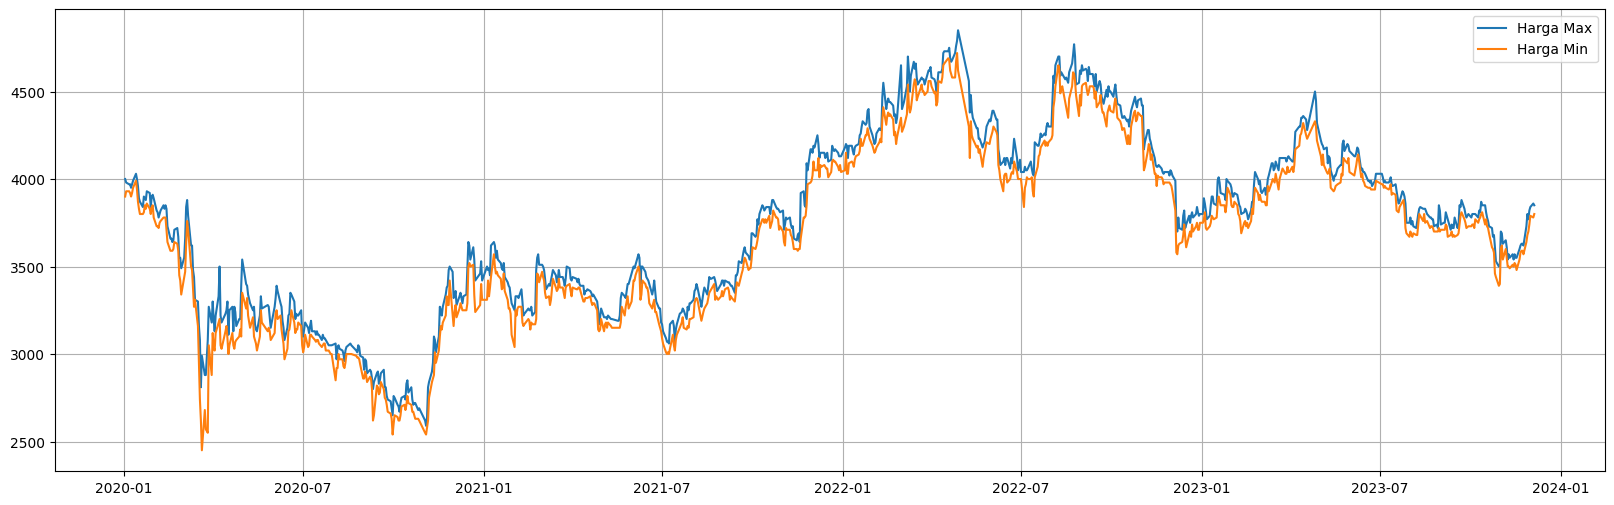

In [17]:
# Line chart dari harga saham minimal dan maksimal
x = df['Date']
y1 = df['High']
y2 = df['Low']

plt.figure(figsize=(20,6))
plt.plot(x, y1, label="Harga Max")
plt.plot(x, y2, label="Harga Min")

plt.grid(True)
plt.legend()
plt.show()

### Kapan harga saham dititik yang rendah?

<Axes: xlabel='Month Year'>

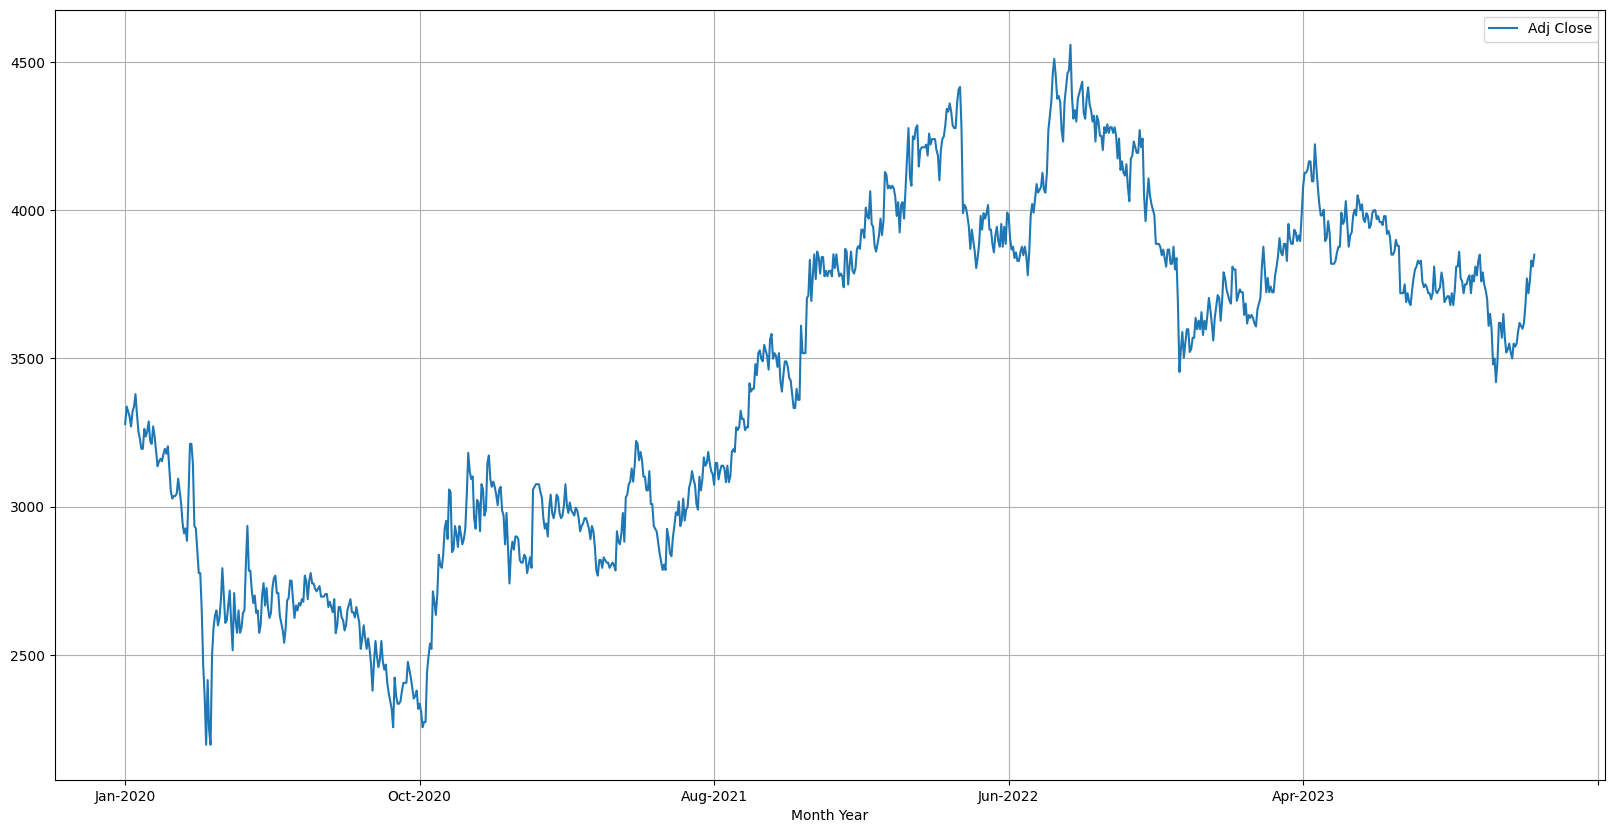

In [18]:
# membuat kolom Year, Month dan Month Year dari kolom Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df['Month Year'] = df['Date'].dt.strftime('%b-%Y')

# Line plot dari tahun 2020 sampai 2023
df.plot(kind='line',x="Month Year",y="Adj Close", figsize=(20,10), grid=True)

Harga terendah dari saham TLKM tahun 2020 : 2197.17 pada Mar-2020


<Axes: xlabel='Month'>

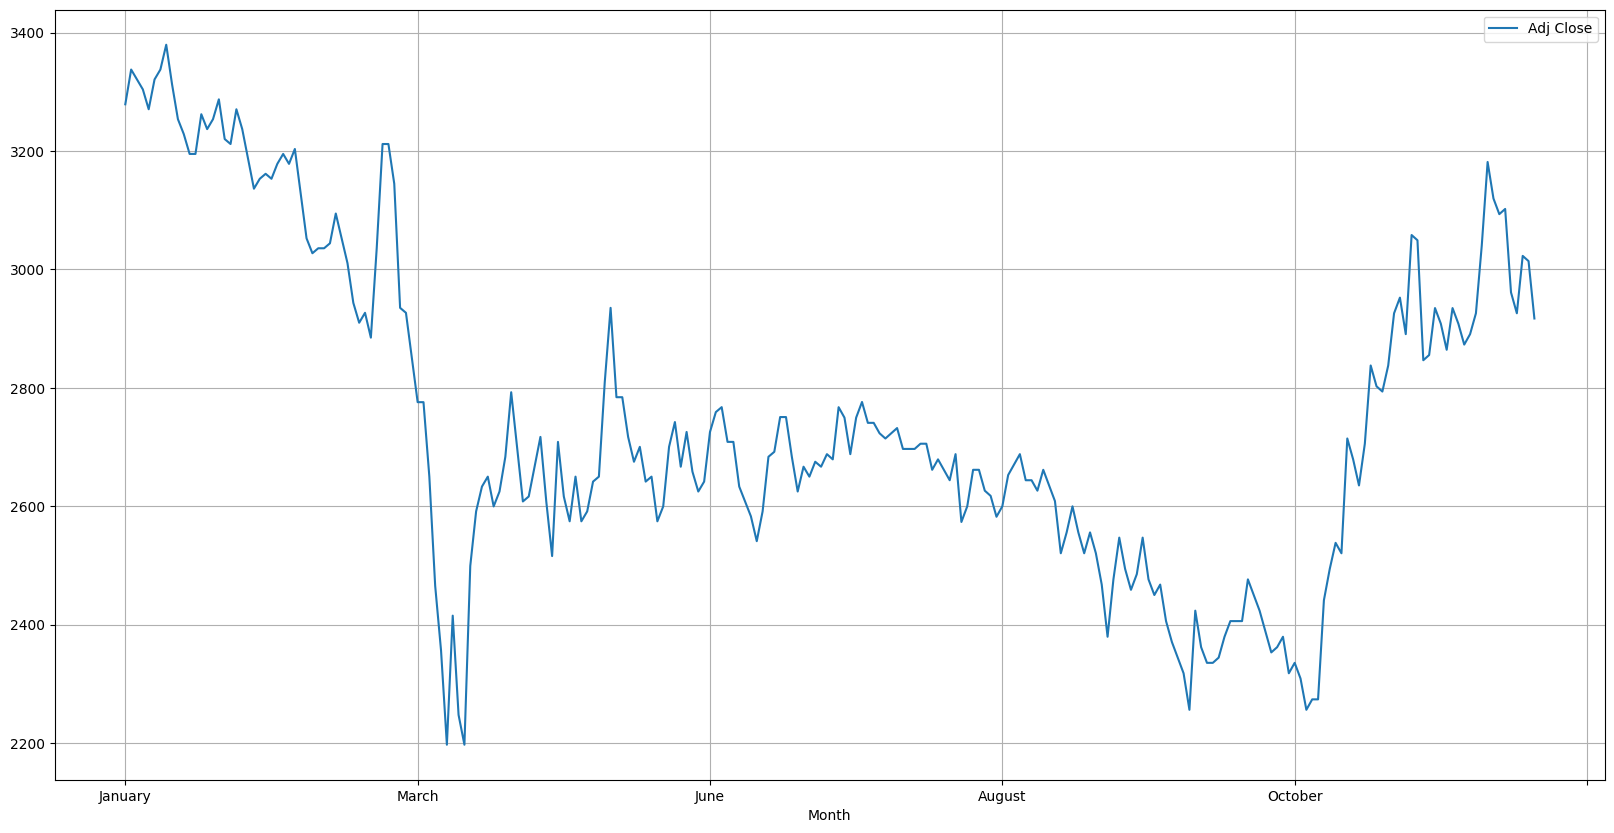

In [19]:
# cek harga terendah pada tahun 2020
tahun2020 = df[df['Year'] == 2020]
min2020 = tahun2020['Adj Close'].min()
dateMin2020 = tahun2020.loc[tahun2020['Adj Close'] == min2020, 'Month Year'].values[0]

print(f"Harga terendah dari saham TLKM tahun 2020 : {min2020:.2f} pada {dateMin2020}")

tahun2020.plot(kind='line',x="Month",y="Adj Close", figsize=(20,10), grid=True)

Dari hasil cek minimal dan line plot didapatkan harga terendah pada tahun 2020 adalah 2197.17 pada di bulan maret 2020/ akhir Q1.

Harga terendah dari saham TLKM tahun 2021 : 2740.89 pada Jan-2021


<Axes: xlabel='Month'>

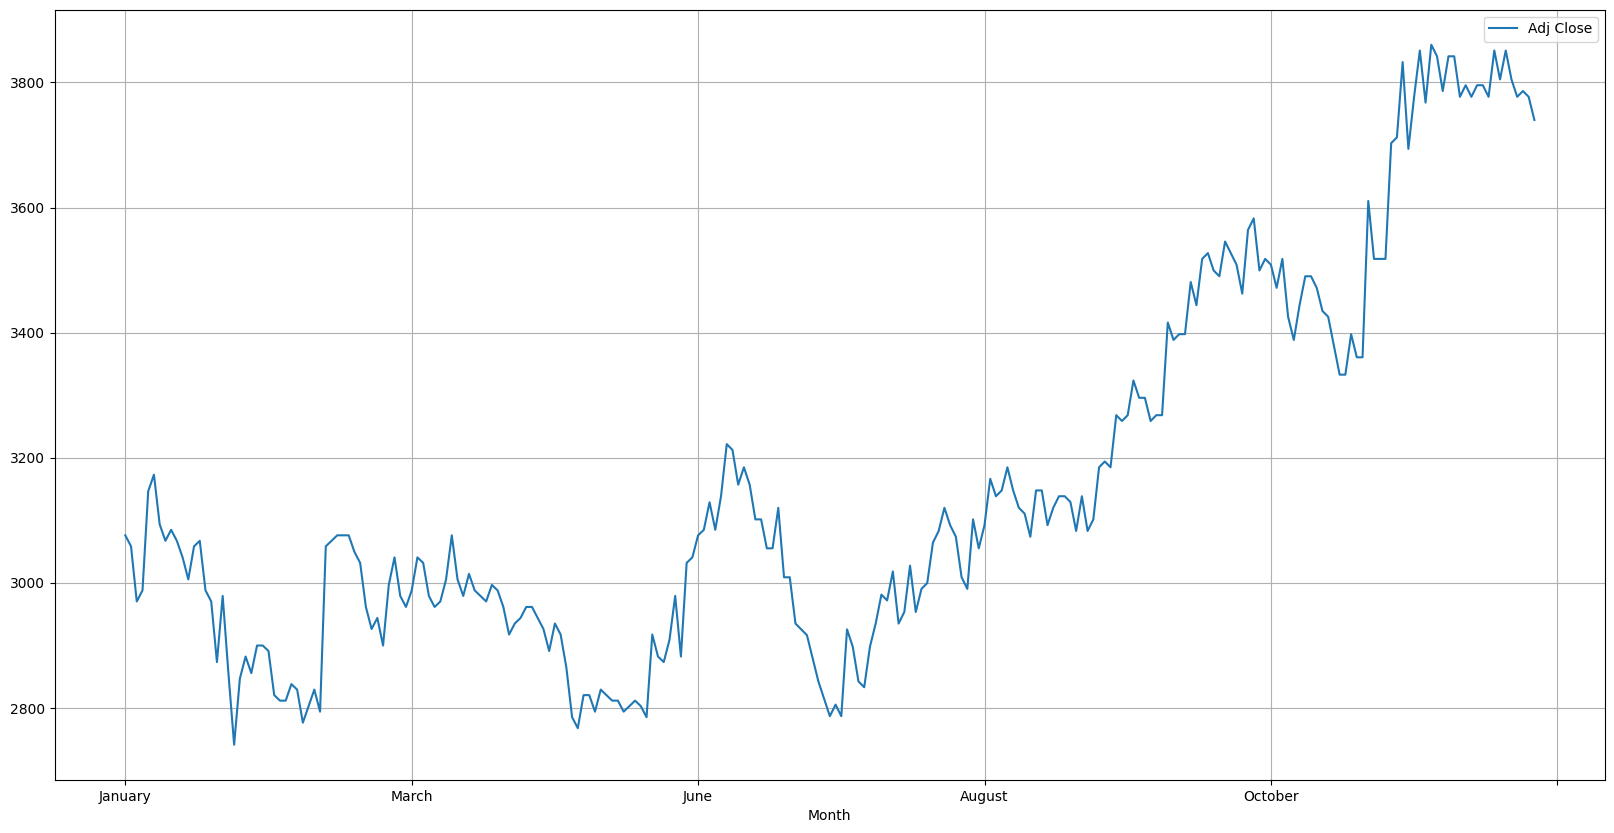

In [20]:
# cek harga terendah pada tahun 2021
tahun2021 = df[df['Year'] == 2021]
min2021 = tahun2021['Adj Close'].min()
dateMin2021 = tahun2021.loc[tahun2021['Adj Close'] == min2021, 'Month Year'].values[0]

print(f"Harga terendah dari saham TLKM tahun 2021 : {min2021:.2f} pada {dateMin2021}")

tahun2021.plot(kind='line',x="Month",y="Adj Close", figsize=(20,10), grid=True)

Dari hasil cek minimal dan line plot didapatkan harga terendah pada tahun 2021 adalah 2740.89 pada disekitar bulan januari 2021/awal Q1.

Harga terendah dari saham TLKM tahun 2022 : 3454.61 pada Dec-2022


<Axes: xlabel='Month'>

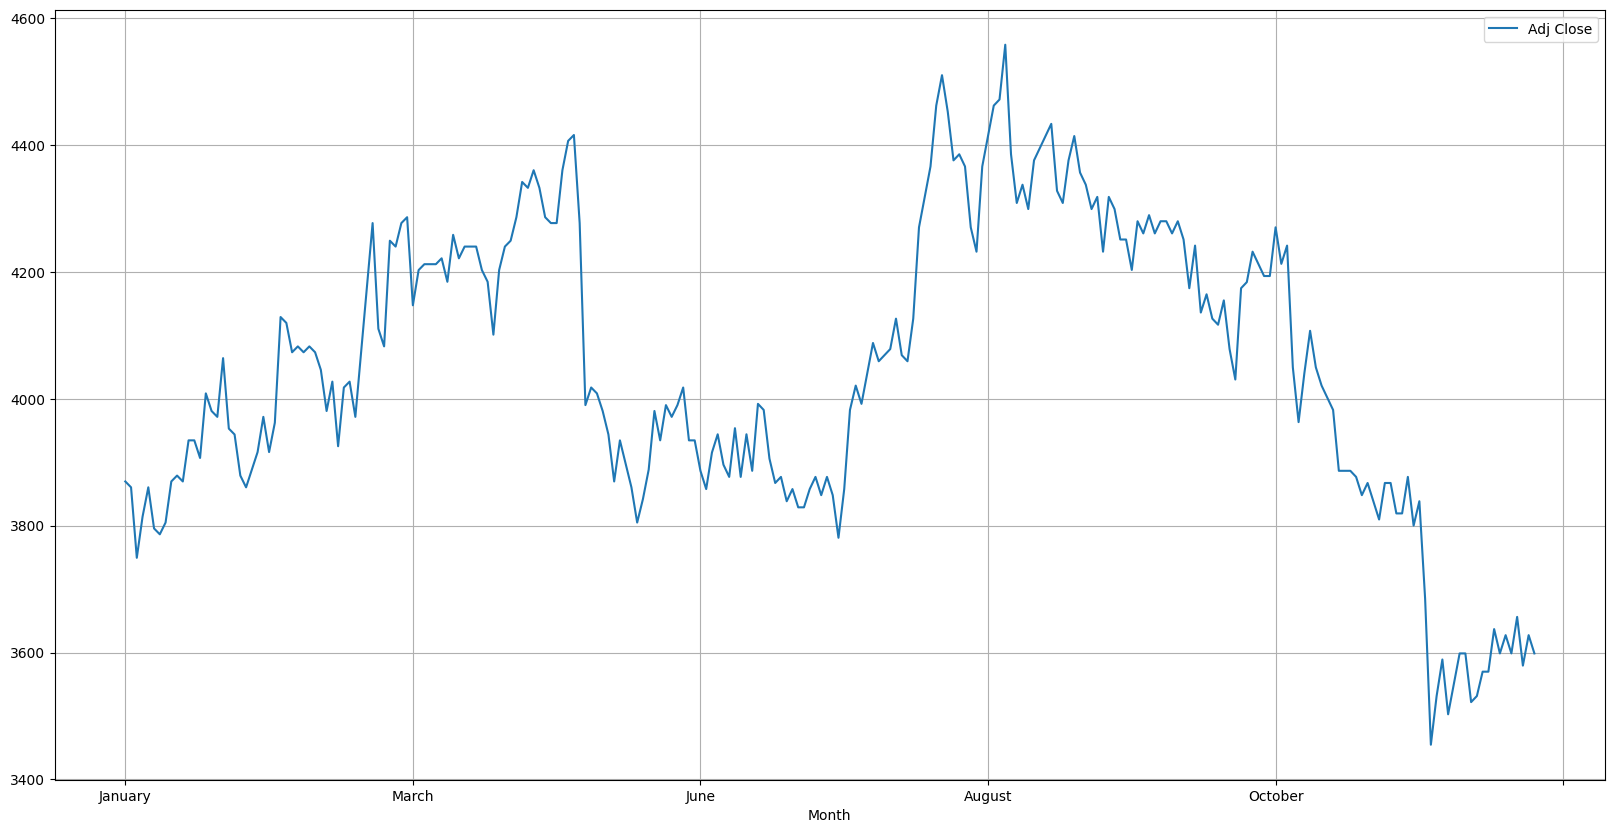

In [21]:
# cek harga terendah pada tahun 2022
tahun2022 = df[df['Year'] == 2022]
min2022 = tahun2022['Adj Close'].min()
dateMin2022 = tahun2022.loc[tahun2022['Adj Close'] == min2022, 'Month Year'].values[0]

print(f"Harga terendah dari saham TLKM tahun 2022 : {min2022:.2f} pada {dateMin2022}")

tahun2022.plot(kind='line',x="Month",y="Adj Close", figsize=(20,10), grid=True)

Dari hasil cek minimal dan line plot didapatkan harga terendah pada tahun 2022 adalah 3454.61 pada disekitar bulan Desember 2022/akhir Q4.

Harga terendah dari saham TLKM tahun 2023 : 3420.00 pada Oct-2023


<Axes: xlabel='Month'>

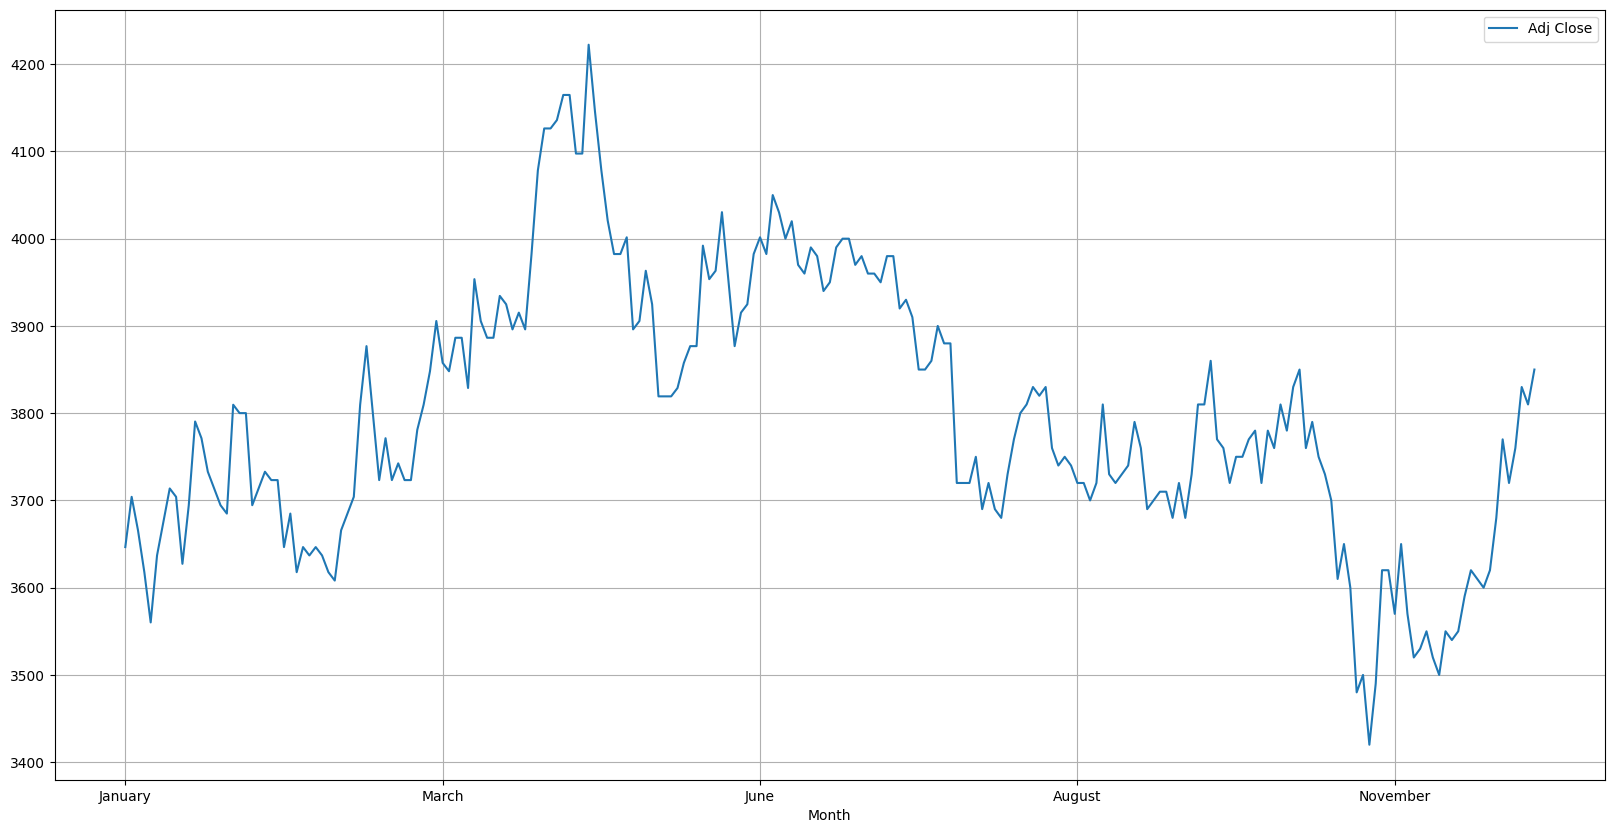

In [22]:
# cek harga terendah pada tahun 2023
tahun2023 = df[df['Year'] == 2023]
min2023 = tahun2023['Adj Close'].min()
dateMin2023 = tahun2023.loc[tahun2023['Adj Close'] == min2023, 'Month Year'].values[0]

print(f"Harga terendah dari saham TLKM tahun 2023 : {min2023:.2f} pada {dateMin2023}")

tahun2023.plot(kind='line',x="Month",y="Adj Close", figsize=(20,10), grid=True)

Dari hasil cek minimal dan line plot didapatkan harga terendah pada tahun 2023 adalah 3420.00 pada disekitar bulan Oktober 2023/awal Q4.

Dari hasil Line chart harga saham TLKM berada dititik terendah pada saat awal Q1,akhir Q1, awal Q4 atau akhir Q4. Pada titik ini adalah kesempatan yang paling cocok untuk membeli saham.

### Kapan harga saham dititik yang tinggi?

<Axes: xlabel='Month Year'>

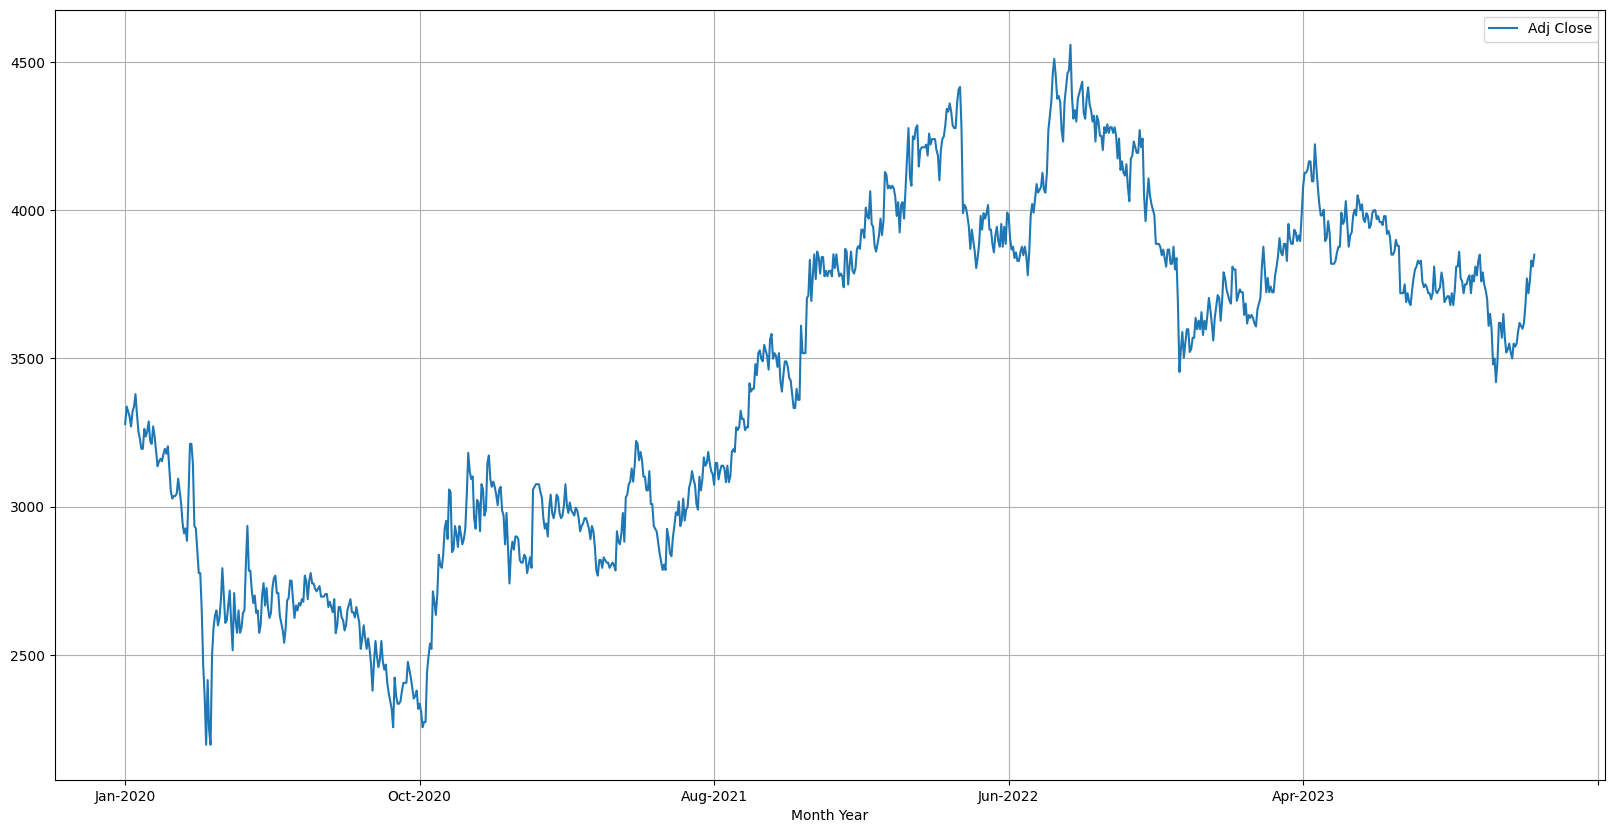

In [23]:
# Line plot dari tahun 2020 sampai 2023
df.plot(kind='line',x="Month Year",y="Adj Close", figsize=(20,10), grid=True)

Harga tertinggi dari saham TLKM tahun 2020 : 3379.62 pada Jan-2020


<Axes: xlabel='Month'>

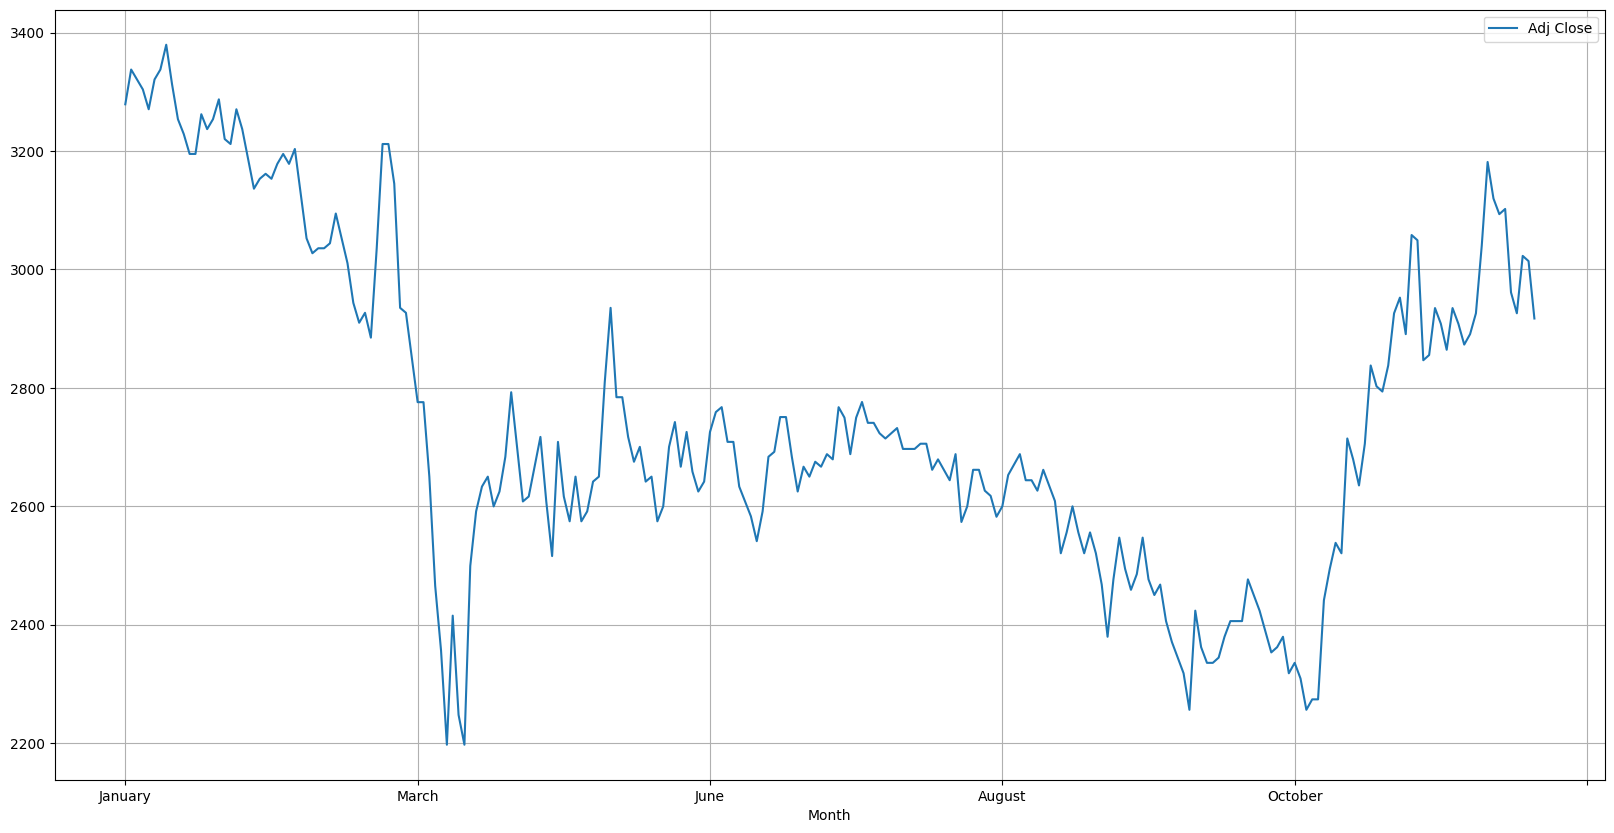

In [24]:
# cek harga tertinggi pada tahun 2020
max2020 = tahun2020['Adj Close'].max()
dateMax2020 = tahun2020.loc[tahun2020['Adj Close'] == max2020, 'Month Year'].values[0]

print(f"Harga tertinggi dari saham TLKM tahun 2020 : {max2020:.2f} pada {dateMax2020}")

tahun2020.plot(kind='line',x="Month",y="Adj Close", figsize=(20,10), grid=True)

Dari hasil cek maximum dan line plot didapatkan harga tertinggi pada tahun 2020 adalah 3379.62 pada disekitar bulan Januari 2020/awal Q1.

Harga tertinggi dari saham TLKM tahun 2021 : 3860.39 pada Dec-2021


<Axes: xlabel='Month'>

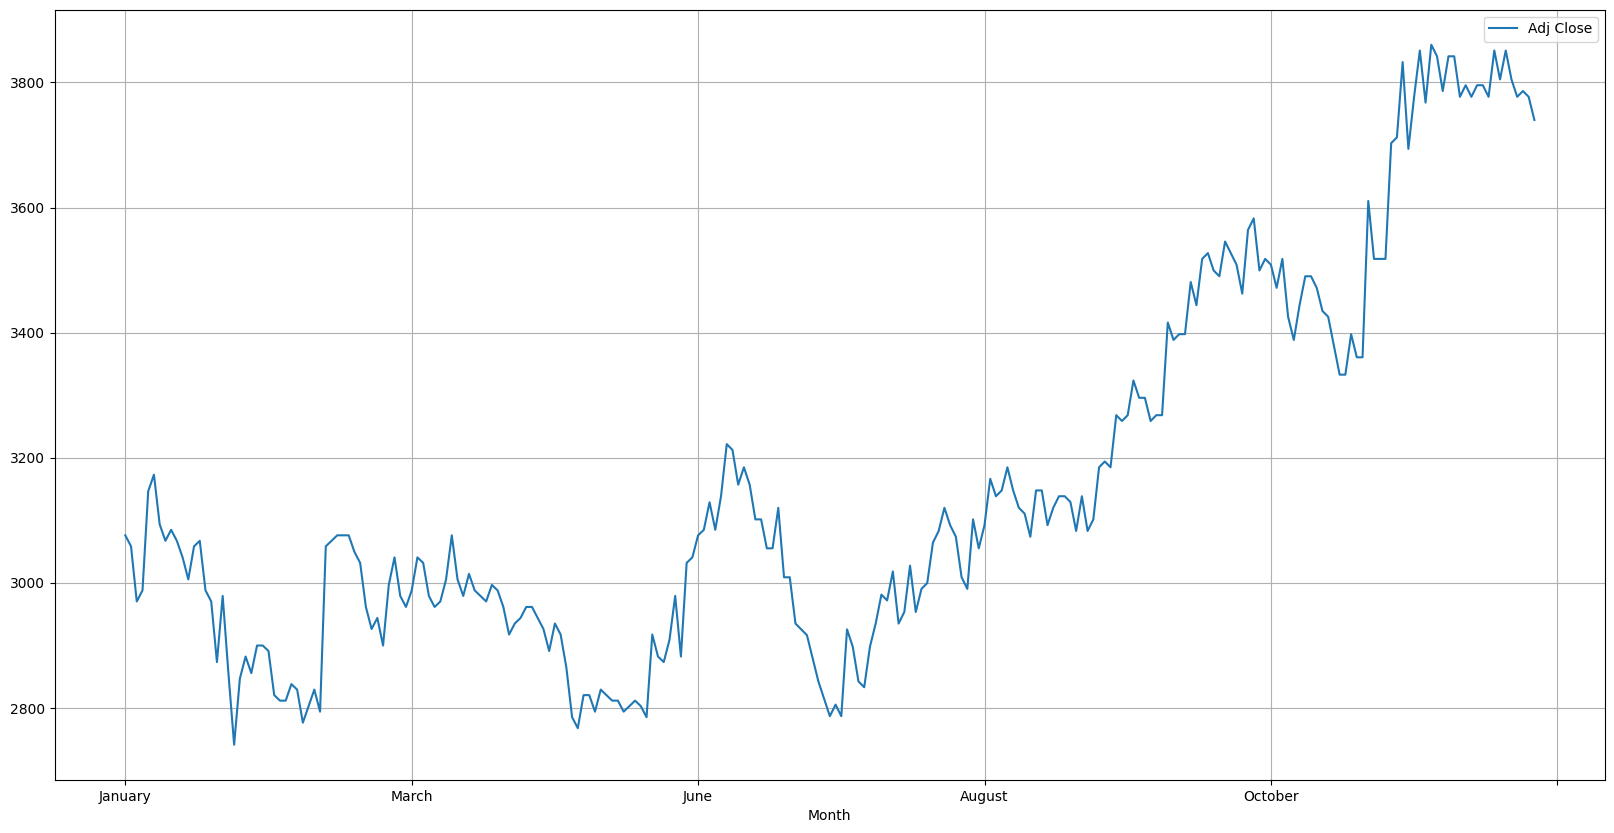

In [25]:
# cek harga tertinggi pada tahun 2021
max2021 = tahun2021['Adj Close'].max()
dateMax2021 = tahun2021.loc[tahun2021['Adj Close'] == max2021, 'Month Year'].values[0]

print(f"Harga tertinggi dari saham TLKM tahun 2021 : {max2021:.2f} pada {dateMax2021}")

tahun2021.plot(kind='line',x="Month",y="Adj Close", figsize=(20,10), grid=True)

Dari hasil cek maximum dan line plot didapatkan harga tertinggi pada tahun 2021 adalah 3860.39 pada disekitar bulan Desember 2021/akhir Q4.

Harga tertinggi dari saham TLKM tahun 2021 : 4558.17 pada Aug-2022


<Axes: xlabel='Month'>

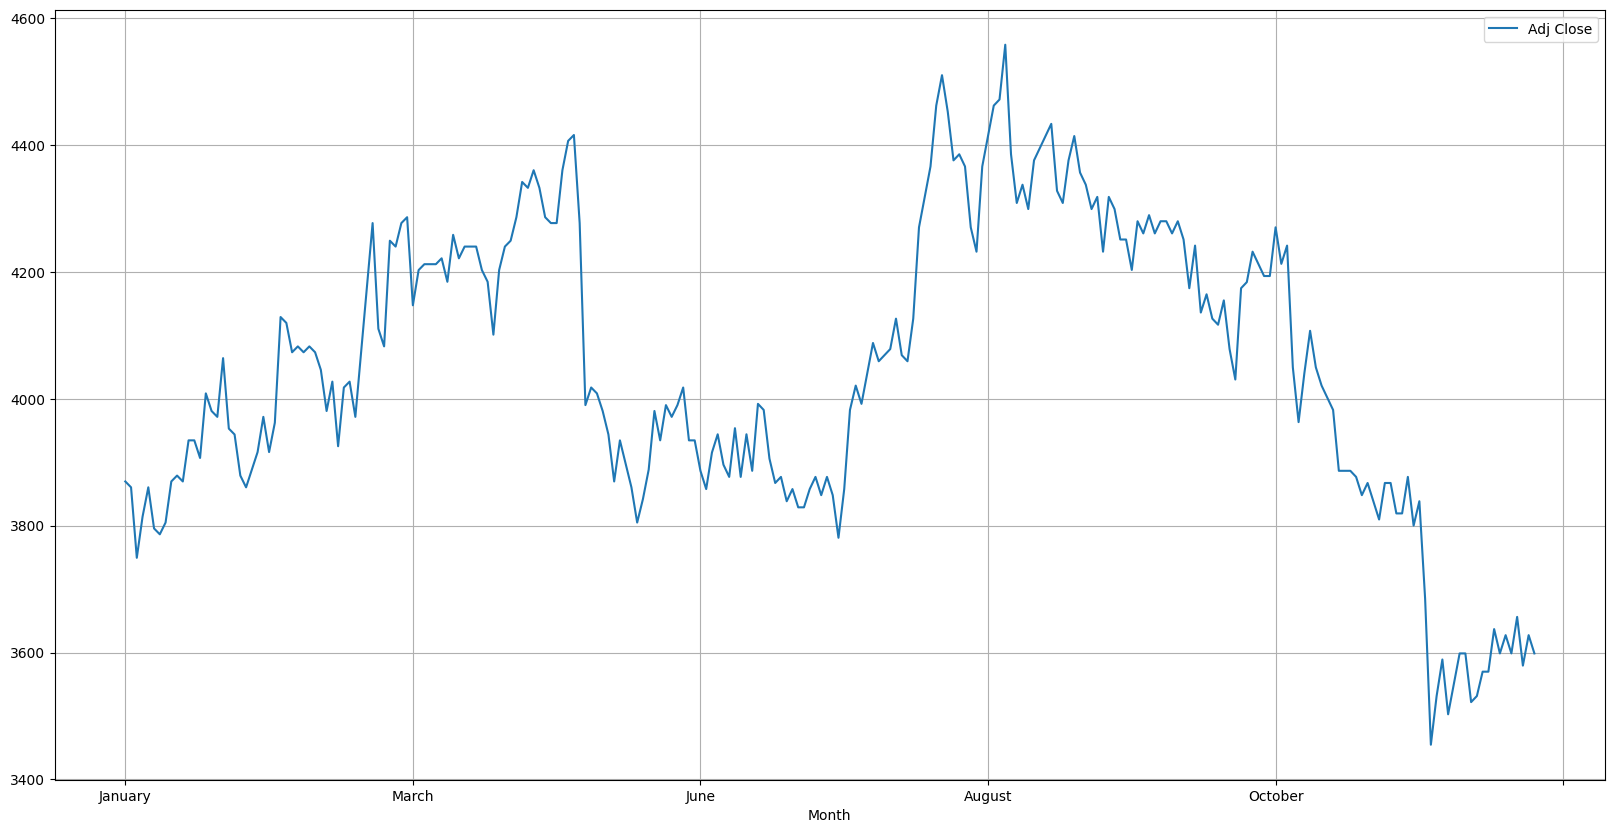

In [26]:
# cek harga tertinggi pada tahun 2022
max2022 = tahun2022['Adj Close'].max()
dateMax2022 = tahun2022.loc[tahun2022['Adj Close'] == max2022, 'Month Year'].values[0]

print(f"Harga tertinggi dari saham TLKM tahun 2021 : {max2022:.2f} pada {dateMax2022}")

tahun2022.plot(kind='line',x="Month",y="Adj Close", figsize=(20,10), grid=True)

Dari hasil cek maximum dan line plot didapatkan harga tertinggi pada tahun 2022 adalah 4558.17 pada disekitar bulan Agustus 2022/pertengahan Q3.

Harga tertinggi dari saham TLKM tahun 2021 : 4222.30 pada Apr-2023


<Axes: xlabel='Month'>

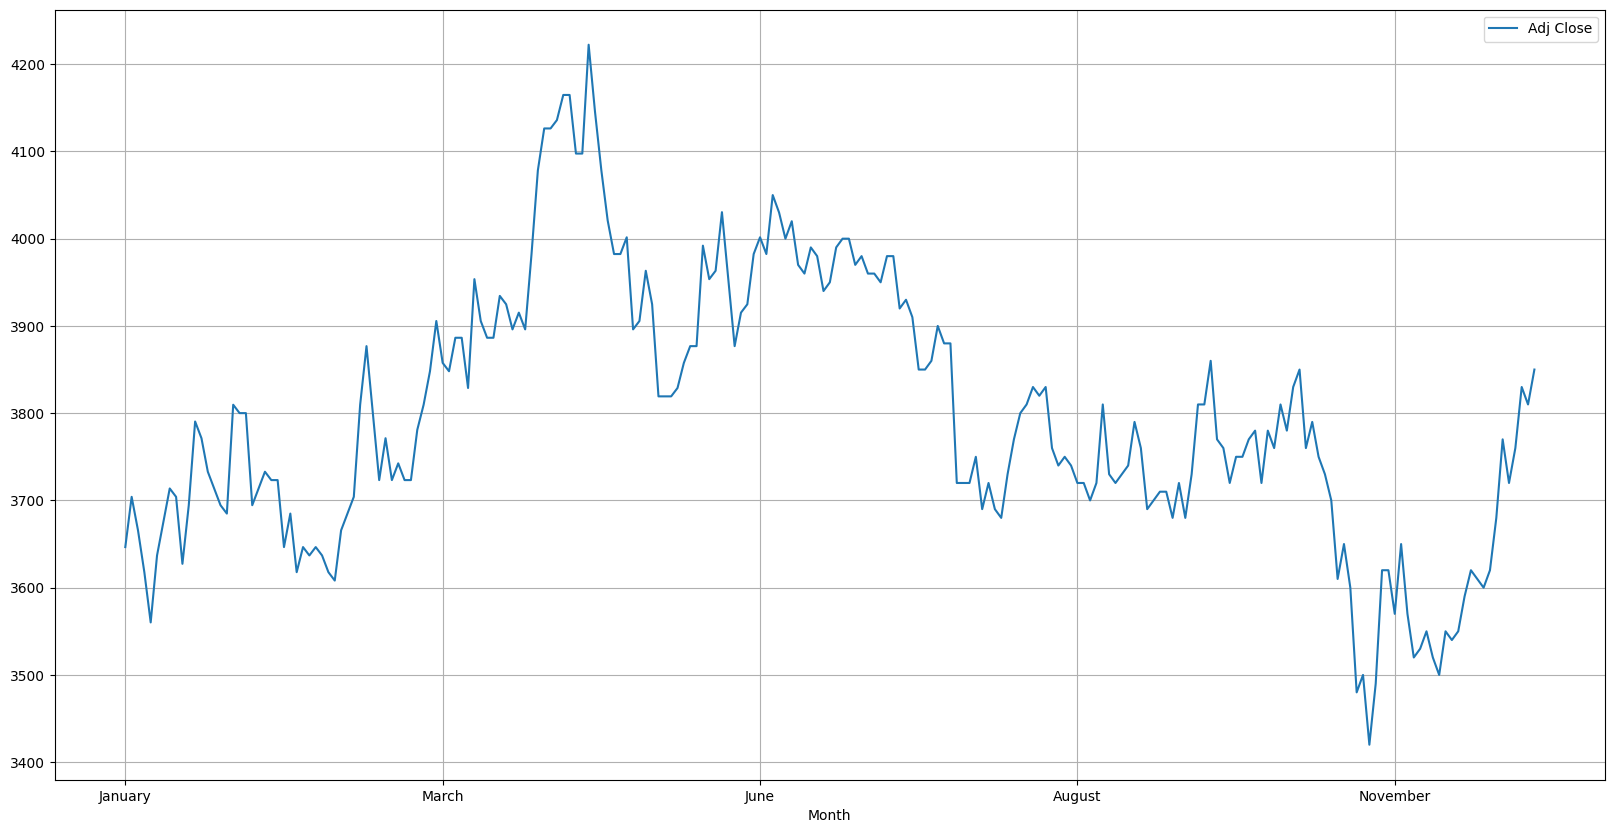

In [27]:
# cek harga tertinggi pada tahun 2023
max2023 = tahun2023['Adj Close'].max()
dateMax2023 = tahun2023.loc[tahun2023['Adj Close'] == max2023, 'Month Year'].values[0]

print(f"Harga tertinggi dari saham TLKM tahun 2021 : {max2023:.2f} pada {dateMax2023}")

tahun2023.plot(kind='line',x="Month",y="Adj Close", figsize=(20,10), grid=True)

Dari hasil cek maximum dan line plot didapatkan harga tertinggi pada tahun 2023 adalah 4222.30 pada disekitar bulan April 2023/awal Q2.

Dari hasil Line chart harga saham TLKM berada dititik tertinggi pada saat awal Q1, awal Q2, pertengahan Q3 atau akhir Q4. Pada dititik ini adalah kesempatan menjual saham, karena kesempatan menjualnya beragam bisa dari Q1 sampai Q4, maka jual lah saham disaat ROInya cukup besar.

### Bagaimana tren pergerakan harga saham TLKM selama periode 2020 sampai 2023?

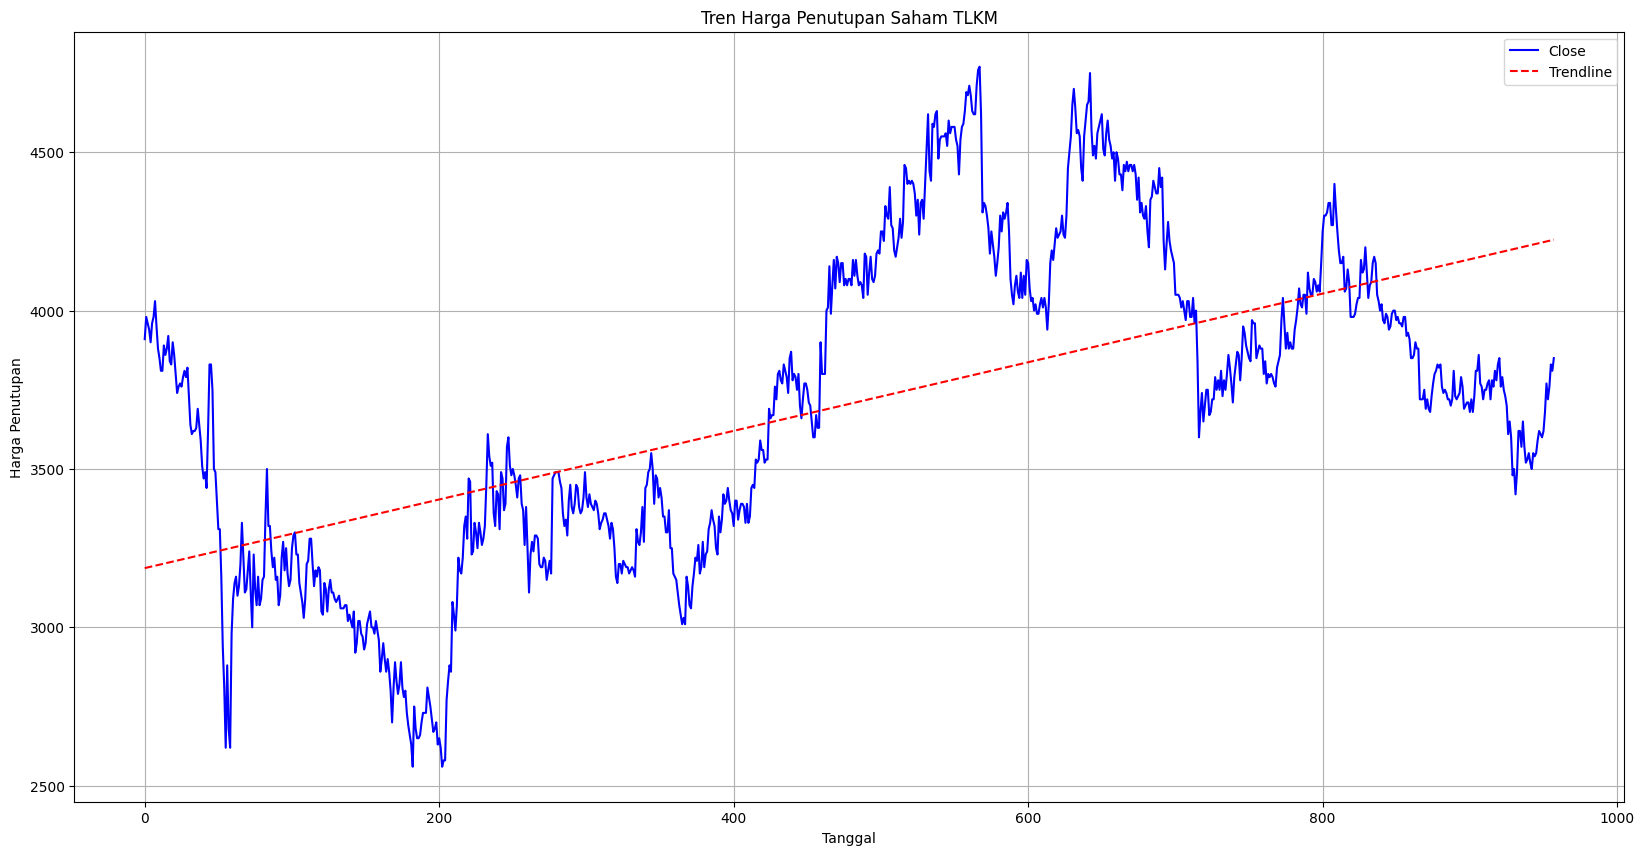

In [28]:
# Line chart trend 2020 sampai 2023
# menghitung parameter garis tren
z = np.polyfit(df.index, df['Close'], 1)
p = np.poly1d(z)

plt.figure(figsize=(20,10))

# Garis Open dan Close
plt.plot(df.index, df['Close'], label='Close', color='blue')

# Garis Tren
plt.plot(df.index, p(df.index), label='Trendline', color='red', linestyle='--')

plt.title('Tren Harga Penutupan Saham TLKM')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan')

plt.legend()
plt.grid(True)
plt.show()

Dari hasil grafik dapat dilihat bahwa trend harga saham TLKM dari tahun 2020 - 2023 cenderung naik/uptrend.

#### Tren saham TLKM pada 1 tahun terakhir

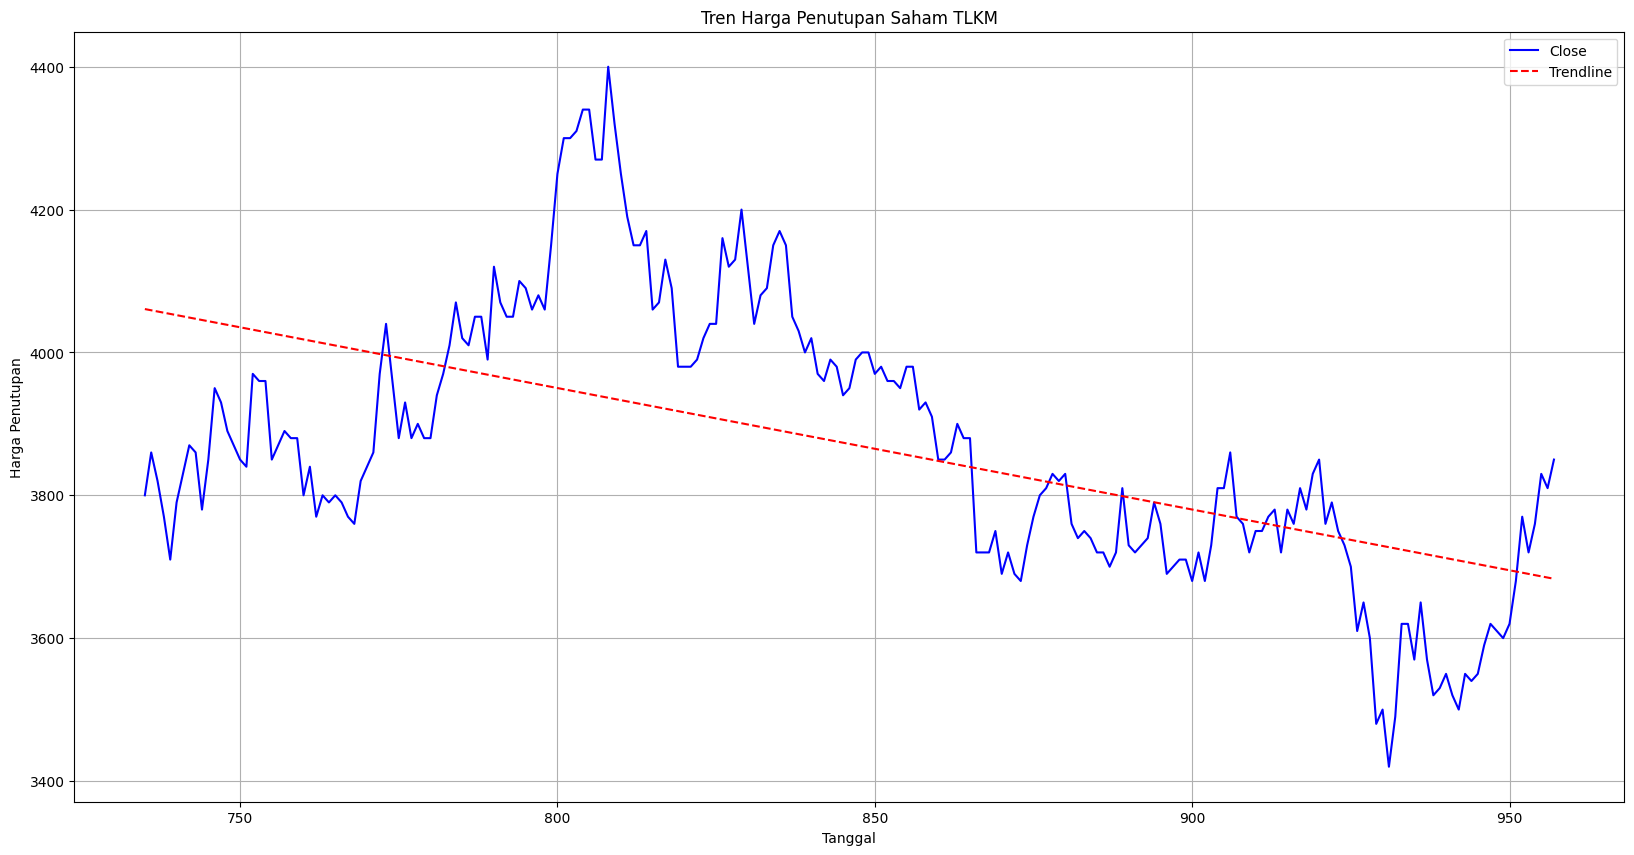

In [29]:
# Line Chart trend 2023
# menghitung parameter garis tren 2023
z = np.polyfit(tahun2023.index, tahun2023['Close'], 1)
p = np.poly1d(z)

plt.figure(figsize=(20,10))

# Garis Open dan Close
plt.plot(tahun2023.index, tahun2023['Close'], label='Close', color='blue')

# Garis Tren
plt.plot(tahun2023.index, p(tahun2023.index), label='Trendline', color='red', linestyle='--')

plt.title('Tren Harga Penutupan Saham TLKM')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan')

plt.legend()
plt.grid(True)
plt.show()

Jika dilihat dari hasil Line chart 1 tahun terakhir saham TLKM, harga saham cenderung turun/downtrend.

Dari hasil line chart, tren saham TLKM dari tahun 2020 sampai tahun 2023 harga saham cenderung naik/uptrend, dan ketika dilihat harga saham pada tahun 2023 harga saham cenderung turun/atau downtrend, yang artinya sekarang adalah waktu yang tepat untuk membeli saham dikarenakan trend saham sedang downtrend dan bisa dipastikan harga akan terus naik atau tetap stabil kecuali terjadi hal yang membuat pemegang saham menjual semua sahamnya sehingga downtrend.

### Berapa minimum dan maximum ROI yang bisa didapatkan?

In [30]:
# menghitung ROI
df['ROI'] = (df['Adj Close'] - df['Adj Close'].shift(90))/df['Adj Close'].shift(90)

df

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Month Year,ROI
0,2020-01-02,3970.0,4000.0,3900.0,3910.0,3278.988770,52094000,2020,January,Jan-2020,NaN
1,2020-01-03,3960.0,3980.0,3930.0,3980.0,3337.692139,70032900,2020,January,Jan-2020,NaN
2,2020-01-06,3930.0,3970.0,3930.0,3960.0,3320.919434,42908900,2020,January,Jan-2020,NaN
3,2020-01-07,3930.0,3970.0,3920.0,3940.0,3304.147217,51837600,2020,January,Jan-2020,NaN
4,2020-01-08,3920.0,3950.0,3900.0,3900.0,3270.602295,52402600,2020,January,Jan-2020,NaN
...,...,...,...,...,...,...,...,...,...,...,...
953,2023-11-29,3750.0,3770.0,3700.0,3720.0,3720.000000,56467400,2023,November,Nov-2023,-0.046154
954,2023-11-30,3750.0,3820.0,3740.0,3760.0,3760.000000,258522400,2023,November,Nov-2023,-0.030928
955,2023-12-01,3790.0,3840.0,3790.0,3830.0,3830.000000,81037200,2023,December,Dec-2023,-0.012887
956,2023-12-04,3840.0,3860.0,3780.0,3810.0,3810.000000,118483900,2023,December,Dec-2023,0.024194


In [31]:
# menghitung Mean,Standard Deviasi dan Confidence Level kolom ROI
meanROI = df['ROI'].mean()
stdROI  = df['ROI'].std()
nROI = len(df['ROI'])

lowROI , upROI  = stats.norm.interval(0.95,meanROI ,scale=stdROI /np.sqrt(nROI ))
print(f'Lower Limit: {lowROI :.2f}')
print(f'Upper Limit: {upROI :.2f}')

Lower Limit: 0.03
Upper Limit: 0.04


dari hasil perhitungan confidence level untuk ROI dapat dilihat minimum ROInya adalah 0.03 atau 3% per 90 hari dan maximumnya adalah 0.04 atau 4% per 90 hari.

<Axes: xlabel='Month Year'>

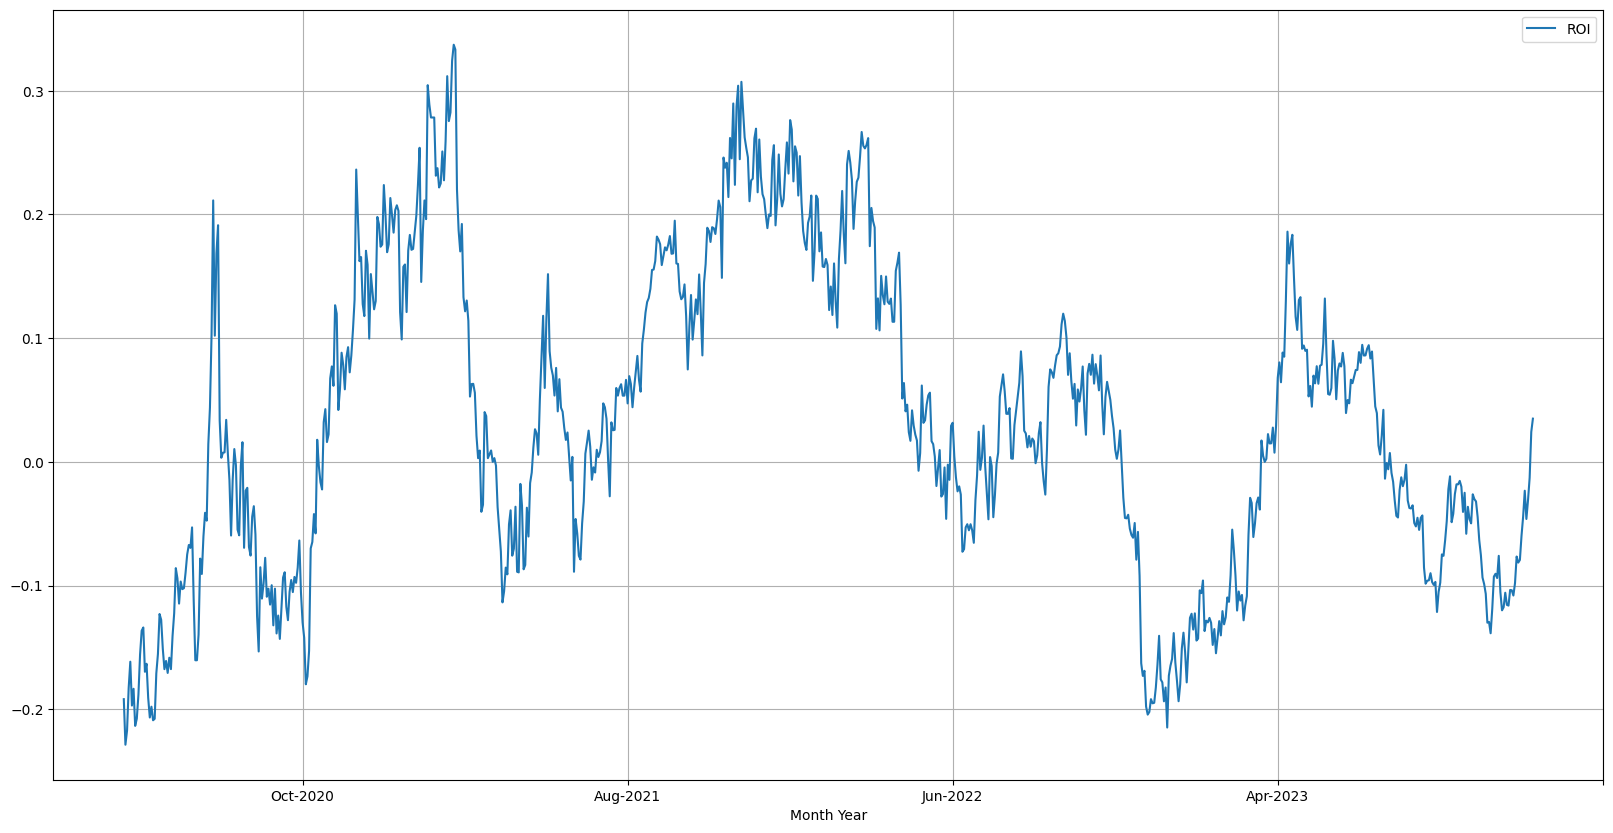

In [37]:
# Bar chart ROI dari tahun 2020 sampai 2023
# dfROI = df.groupby(['Year'])['ROI'].mean()
# dfROI.plot(kind='line',x="Year",y="ROI", figsize=(20,10))
df.plot(kind='line',x="Month Year",y="ROI", figsize=(20,10), grid=True)

ROI terkecil saham TLKM tahun 2020 : -0.23 pada May-2020
ROI terbesar saham TLKM tahun 2020 : 0.24 pada Dec-2020
Rata-rata ROI saham TLKM tahun 2020 : -0.05


<Axes: xlabel='Month'>

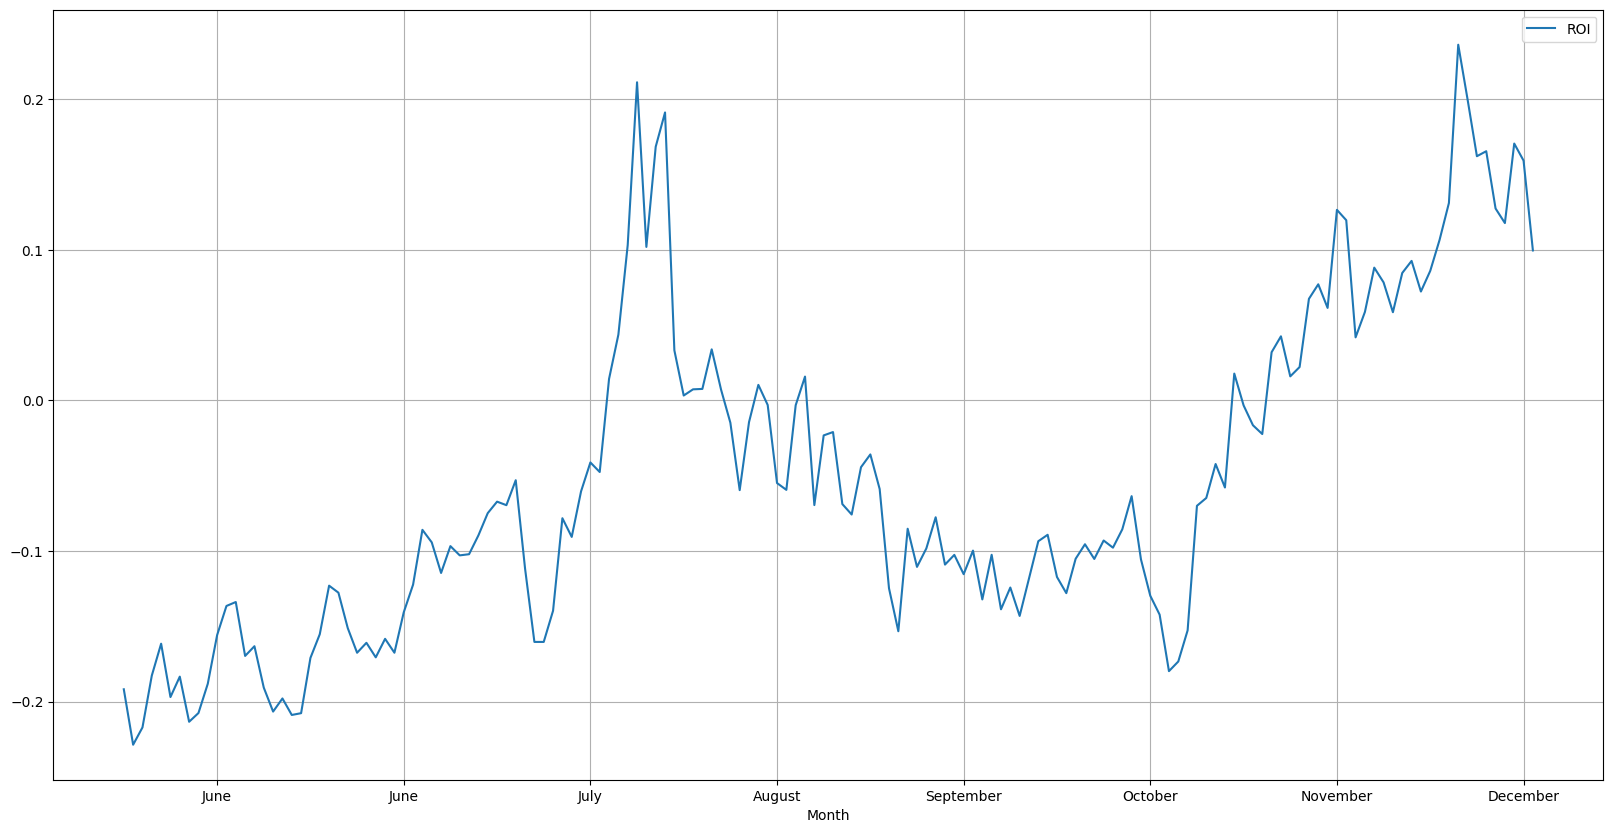

In [38]:
# menghitung min,max dan mean dari ROI pada tahun 2020
minROI2020 = df['ROI'][df['Year'] == 2020].min()
maxROI2020 = df['ROI'][df['Year'] == 2020].max()
meanROI2020 = df['ROI'][df['Year'] == 2020].mean()

print(f"ROI terkecil saham TLKM tahun 2020 : {minROI2020:.2f} pada {df.loc[df['ROI'] == minROI2020, 'Month Year'].values[0]}")
print(f"ROI terbesar saham TLKM tahun 2020 : {maxROI2020:.2f} pada {df.loc[df['ROI'] == maxROI2020, 'Month Year'].values[0]}")
print(f"Rata-rata ROI saham TLKM tahun 2020 : {meanROI2020:.2f}")

# Bar chart ROI tahun 2020
# df2020 = df[df['Year'] == 2020].groupby(df['Month'])['ROI'].mean()
# df2020 = df2020.sort_index(key=lambda x: pd.to_datetime(x, format="%B")) # Sort bulan

# df2020.plot(kind='bar',x="Month",y="ROI", figsize=(20,10))

df[df['Year'] == 2020].plot(kind='line',x="Month",y="ROI", figsize=(20,10), grid=True)

Dari line chart ROI tahun 2020, ROI yang paling menguntungkan adalah 0.24 atau 24% pada bulan Desember 2020, ROI paling merugikan adalah -0.23 atau -23% pada bulan Mei 2020, dan rata-rata ROInya adalah -0.05 atau -5%.

ROI terkecil saham TLKM tahun 2021 : -0.11 pada Apr-2021
ROI terbesar saham TLKM tahun 2021 : 0.34 pada Mar-2021
Rata-rata ROI saham TLKM tahun 2021 : 0.11


<Axes: xlabel='Month'>

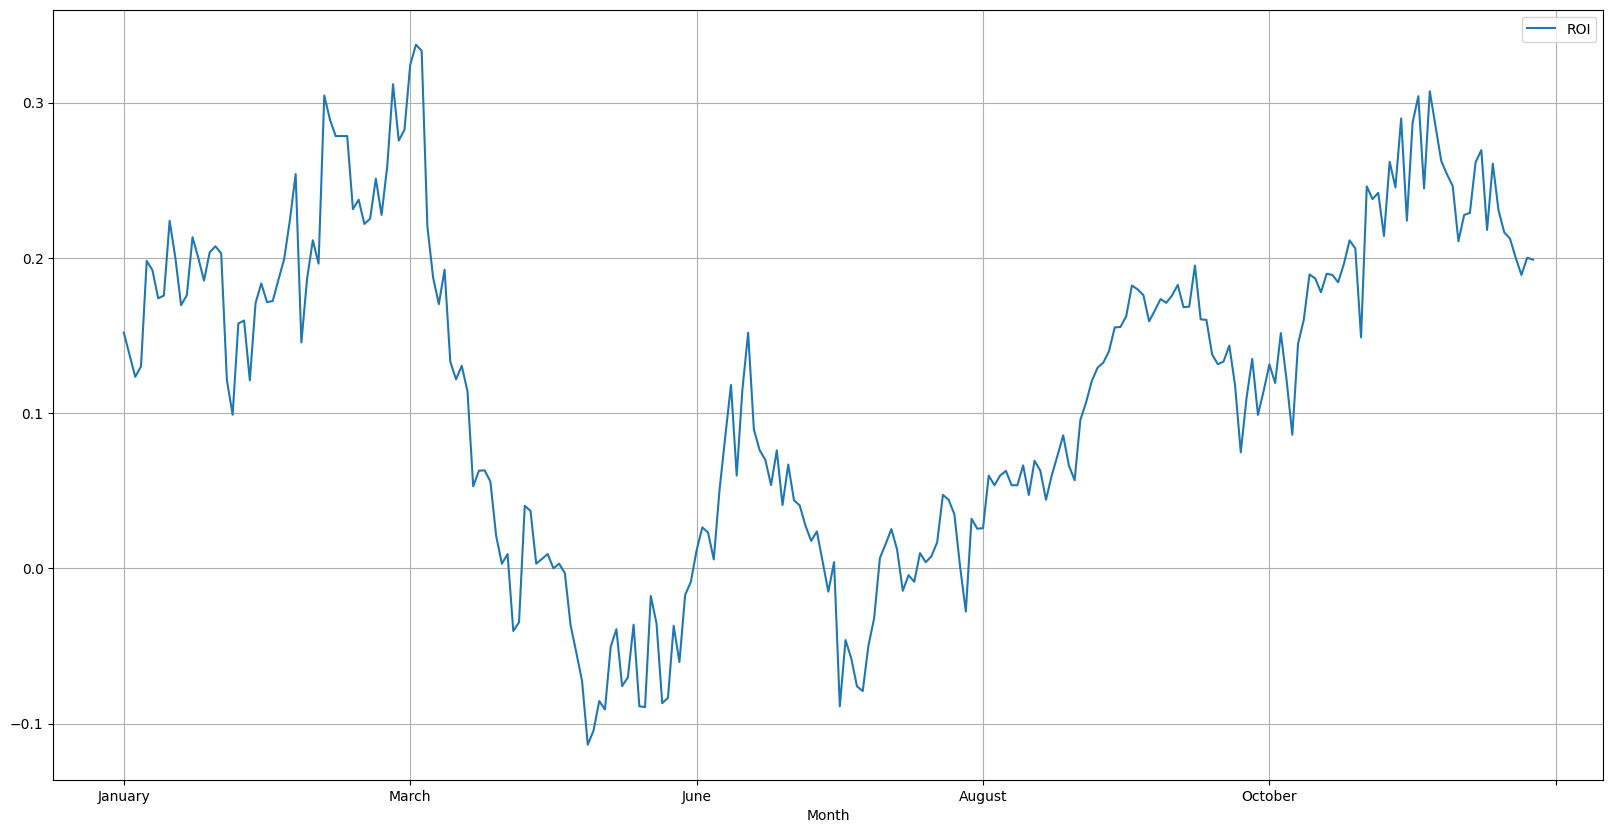

In [39]:
# menghitung min,max dan mean dari ROI pada tahun 2021
minROI2021 = df['ROI'][df['Year'] == 2021].min()
maxROI2021 = df['ROI'][df['Year'] == 2021].max()
meanROI2021 = df['ROI'][df['Year'] == 2021].mean()

print(f"ROI terkecil saham TLKM tahun 2021 : {minROI2021:.2f} pada {df.loc[df['ROI'] == minROI2021, 'Month Year'].values[0]}")
print(f"ROI terbesar saham TLKM tahun 2021 : {maxROI2021:.2f} pada {df.loc[df['ROI'] == maxROI2021, 'Month Year'].values[0]}")
print(f"Rata-rata ROI saham TLKM tahun 2021 : {meanROI2021:.2f}")

# Bar chart ROI tahun 2021
# df2021 = df[df['Year'] == 2021].groupby(df['Month'])['ROI'].mean()
# df2021 = df2021.sort_index(key=lambda x: pd.to_datetime(x, format="%B")) # Sort bulan

# df2021.plot(kind='bar',x="Month",y="ROI", figsize=(20,10))
df[df['Year'] == 2021].plot(kind='line',x="Month",y="ROI", figsize=(20,10), grid=True)

Dari line chart ROI tahun 2021, ROI yang paling menguntungkan adalah 0.34 atau 34% pada bulan Maret 2021, ROI paling merugikan adalah -0.11 atau -11% pada bulan April 2021, dan rata-rata ROInya adalah 0.11 atau 11%.

ROI terkecil saham TLKM tahun 2022 : -0.21 pada Dec-2022
ROI terbesar saham TLKM tahun 2022 : 0.28 pada Jan-2022
Rata-rata ROI saham TLKM tahun 2022 : 0.06


<Axes: xlabel='Month'>

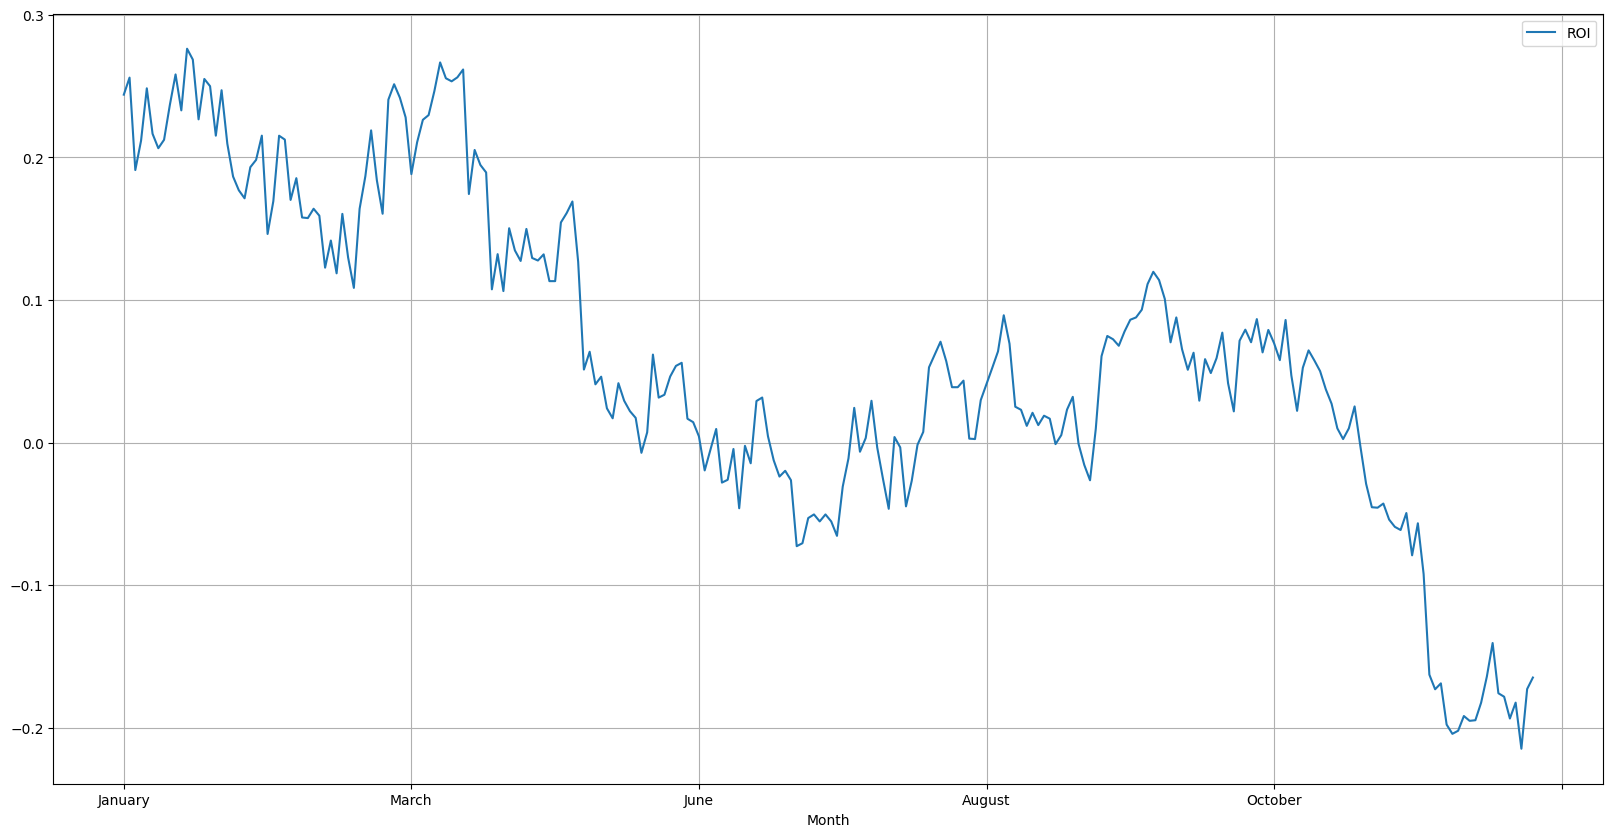

In [40]:
# menghitung min,max dan mean dari ROI pada tahun 2022
minROI2022 = df['ROI'][df['Year'] == 2022].min()
maxROI2022 = df['ROI'][df['Year'] == 2022].max()
meanROI2022 = df['ROI'][df['Year'] == 2022].mean()

print(f"ROI terkecil saham TLKM tahun 2022 : {minROI2022:.2f} pada {df.loc[df['ROI'] == minROI2022, 'Month Year'].values[0]}")
print(f"ROI terbesar saham TLKM tahun 2022 : {maxROI2022:.2f} pada {df.loc[df['ROI'] == maxROI2022, 'Month Year'].values[0]}")
print(f"Rata-rata ROI saham TLKM tahun 2022 : {meanROI2022:.2f}")

# Bar chart ROI tahun 2022
# df2022 = df[df['Year'] == 2022].groupby(df['Month'])['ROI'].mean()
# df2022 = df2022.sort_index(key=lambda x: pd.to_datetime(x, format="%B")) # Sort bulan

# df2022.plot(kind='bar',x="Month",y="ROI", figsize=(20,10))
df[df['Year'] == 2022].plot(kind='line',x="Month",y="ROI", figsize=(20,10), grid=True)

Dari line chart ROI tahun 2022, ROI yang paling menguntungkan adalah 0.28 atau 28% pada bulan Januari 2022, ROI paling merugikan adalah -0.21 atau -21% pada bulan Desember 2022, dan rata-rata ROInya adalah 0.06 atau 6%.

ROI terkecil saham TLKM tahun 2023 : -0.19 pada Jan-2023
ROI terbesar saham TLKM tahun 2023 : 0.19 pada Apr-2023
Rata-rata ROI saham TLKM tahun 2023 : -0.03


<Axes: xlabel='Month'>

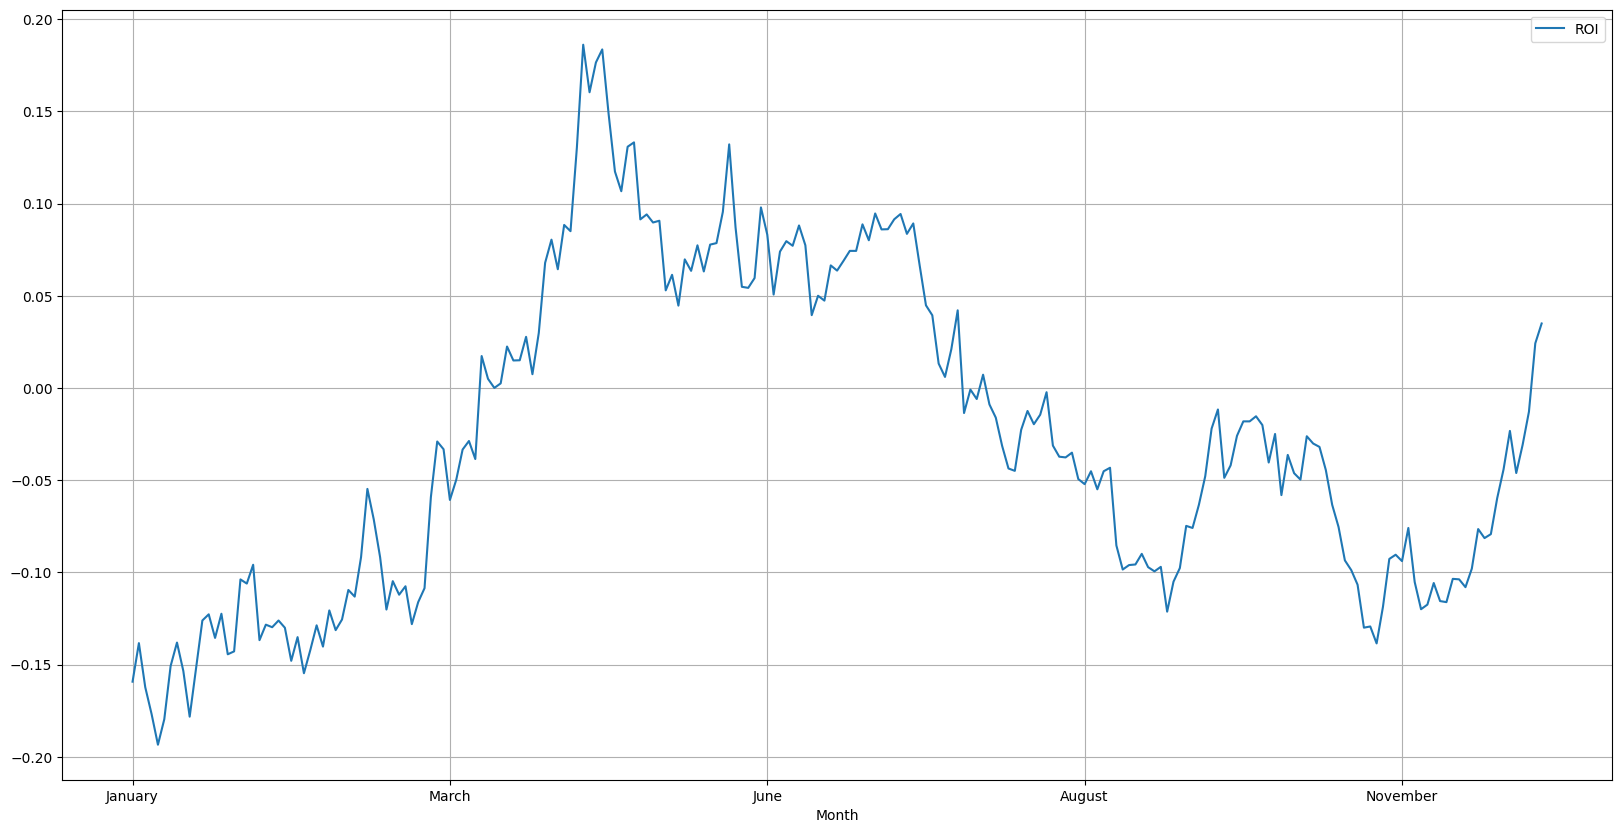

In [41]:
# menghitung min,max dan mean dari ROI pada tahun 2023
minROI2023 = df['ROI'][df['Year'] == 2023].min()
maxROI2023 = df['ROI'][df['Year'] == 2023].max()
meanROI2023 = df['ROI'][df['Year'] == 2023].mean()

print(f"ROI terkecil saham TLKM tahun 2023 : {minROI2023:.2f} pada {df.loc[df['ROI'] == minROI2023, 'Month Year'].values[0]}")
print(f"ROI terbesar saham TLKM tahun 2023 : {maxROI2023:.2f} pada {df.loc[df['ROI'] == maxROI2023, 'Month Year'].values[0]}")
print(f"Rata-rata ROI saham TLKM tahun 2023 : {meanROI2023:.2f}")

# Bar chart ROI tahun 2023
# df2023 = df[df['Year'] == 2023].groupby(df['Month'])['ROI'].mean()
# df2023 = df2023.sort_index(key=lambda x: pd.to_datetime(x, format="%B"))# Sort bulan

# df2023.plot(kind='bar',x="Month",y="ROI", figsize=(20,10))
df[df['Year'] == 2023].plot(kind='line',x="Month",y="ROI", figsize=(20,10), grid=True)

Dari line chart ROI tahun 2023, ROI yang paling menguntungkan adalah 0.19 atau 19% pada bulan April 2023, ROI paling merugikan adalah -0.19 atau -19% pada bulan Januari 2023, dan rata-rata ROInya adalah -0.03 atau -3%.

### Berapa persent kemungkinan ROI Profit dan Loss?

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Month Year,ROI,Profit
0,2020-01-02,3970.0,4000.0,3900.0,3910.0,3278.988770,52094000,2020,January,2020-01-01,NaN,Loss
1,2020-01-03,3960.0,3980.0,3930.0,3980.0,3337.692139,70032900,2020,January,2020-01-01,NaN,Loss
2,2020-01-06,3930.0,3970.0,3930.0,3960.0,3320.919434,42908900,2020,January,2020-01-01,NaN,Loss
3,2020-01-07,3930.0,3970.0,3920.0,3940.0,3304.147217,51837600,2020,January,2020-01-01,NaN,Loss
4,2020-01-08,3920.0,3950.0,3900.0,3900.0,3270.602295,52402600,2020,January,2020-01-01,NaN,Loss
...,...,...,...,...,...,...,...,...,...,...,...,...
953,2023-11-29,3750.0,3770.0,3700.0,3720.0,3720.000000,56467400,2023,November,2023-11-01,-0.046154,Loss
954,2023-11-30,3750.0,3820.0,3740.0,3760.0,3760.000000,258522400,2023,November,2023-11-01,-0.030928,Loss
955,2023-12-01,3790.0,3840.0,3790.0,3830.0,3830.000000,81037200,2023,December,2023-12-01,-0.012887,Loss
956,2023-12-04,3840.0,3860.0,3780.0,3810.0,3810.000000,118483900,2023,December,2023-12-01,0.024194,Profit


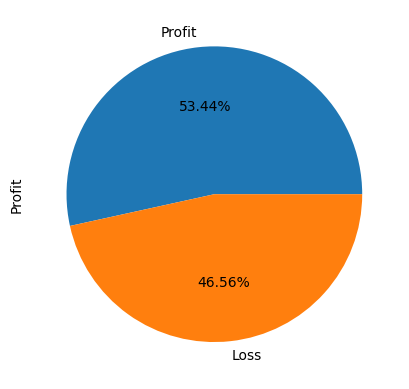

In [180]:
# menghitung presentase untung dan rugi
listProfit = []
for item in df['ROI']:
    if item > 0:
        listProfit.append('Profit')
    else:
        listProfit.append('Loss')

df['Profit'] = listProfit

df['Profit'].value_counts().plot(kind='pie', autopct='%.2f%%')
df

Dari hasil Pie chart dapat dilihat ada kemungkinan saham akan 53.44% Profit dan ada kemungkinan saham akan 46.56% Loss.

In [181]:
# menyimpan hasil analysis kedalam csv untuk diproses di tableau
df.to_csv('TLKM_Analysis.csv', index=False)

## Conclusion

1. Dari hasil pengecekan, dapat dilihat harga minimal sahamnya adalah 2197.17, maximumnya adalah 4558.17, rata-ratanya adalah 3431.70 dan nilai tengahnya adalah 3562.16.
2. Dari hasil Line chart harga saham TLKM berada dititik terendah pada saat awal Q1,akhir Q1, awal Q4 atau akhir Q4. Pada titik ini adalah kesempatan yang paling cocok untuk membeli saham.
3. Dari hasil Line chart harga saham TLKM berada dititik tertinggi pada saat awal Q1, awal Q2, pertengahan Q3 atau akhir Q4. Pada dititik ini adalah kesempatan menjual saham, karena kesempatan menjualnya beragam bisa dari Q1 sampai Q4, maka jual lah saham disaat ROInya cukup besar.
4. Dari hasil line chart, tren saham TLKM dari tahun 2020 sampai tahun 2023 harga saham cenderung naik/uptrend, dan ketika dilihat harga saham pada tahun 2023 harga saham cenderung turun/atau downtrend, yang artinya sekarang adalah waktu yang tepat untuk membeli saham dikarenakan trend saham sedang downtrend dan bisa dipastikan harga akan terus naik atau tetap stabil kecuali terjadi hal yang membuat pemegang saham menjual semua sahamnya sehingga downtrend.
5. Dari hasil perhitungan confidence level untuk ROI dapat dilihat minimum ROInya adalah 0.03 atau 3% per 90 hari dan maximumnya adalah 0.04 atau 4% per 90 hari.
6. Dari hasil Pie chart dapat dilihat ada kemungkinan saham akan 53.44% Profit dan ada kemungkinan saham akan 46.56% Loss.

Dari hasil minimum dan maximumnya ROI, mengejar ROI sebesar 10% tidak dapat dicapai, kecuali membeli saham ketika harganya lagi dititik terendah antara Q1 dan Q4 dan menjualnya disaat harga saham sedang tinggi, ada kemungkinan sebesar 53.44% untuk Profit dan 46.56% untuk Loss saat membeli saham TLKM. Jika melihat trend saham TLKM dalam 1 tahun terakhir, sekarang adalah waktu yang tepat untuk membeli saham dikarenakan trend saham sedang downtrend dan bisa dipastikan harga akan terus naik atau tetap stabil kecuali terjadi hal yang membuat pemegang saham menjual semua sahamnya sehingga downtrend.